  <h1><center>Liver Disease Prediction</center></h1>

According to the WHO data published in 2017 Liver Disease Deaths in India reached 259,749 or 2.95% of total deaths. This project aims to classify the data and provide useful insights which may help doctors. 

The dataset used for classification is obtained from kaggle. It contains data about chemical compounds obtained from tests like SGOT, SGPT which mentions whether a patient needs to be diagnosed or not.

Initially, the required libraries are loaded.

In [1]:
import pandas as pd
import itertools 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [2]:
# import dataset
liver_data_train = pd.read_csv('Indian_Liver_Patients_Dataset.csv')
liver_data_train.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
liver_data_train.shape

(583, 11)

In [4]:
# create a column based on dataset to see if a patient has disease or not
def label_disease(liver_data_train):
    if liver_data_train["Dataset"] == 1:
        return 'yes'
    return 'no'

liver_data_train['HasDisease'] = liver_data_train.apply(lambda liver_data_train: label_disease(liver_data_train), axis=1)

## Data Visualization and Pre-processing

In [5]:
liver_data_train['HasDisease'].value_counts()

yes    416
no     167
Name: HasDisease, dtype: int64

#### Plotting some columns to gain insights from the data

In [6]:
!conda install -c anaconda seaborn -y

'conda' is not recognized as an internal or external command,
operable program or batch file.


First, the relationship between gender and age

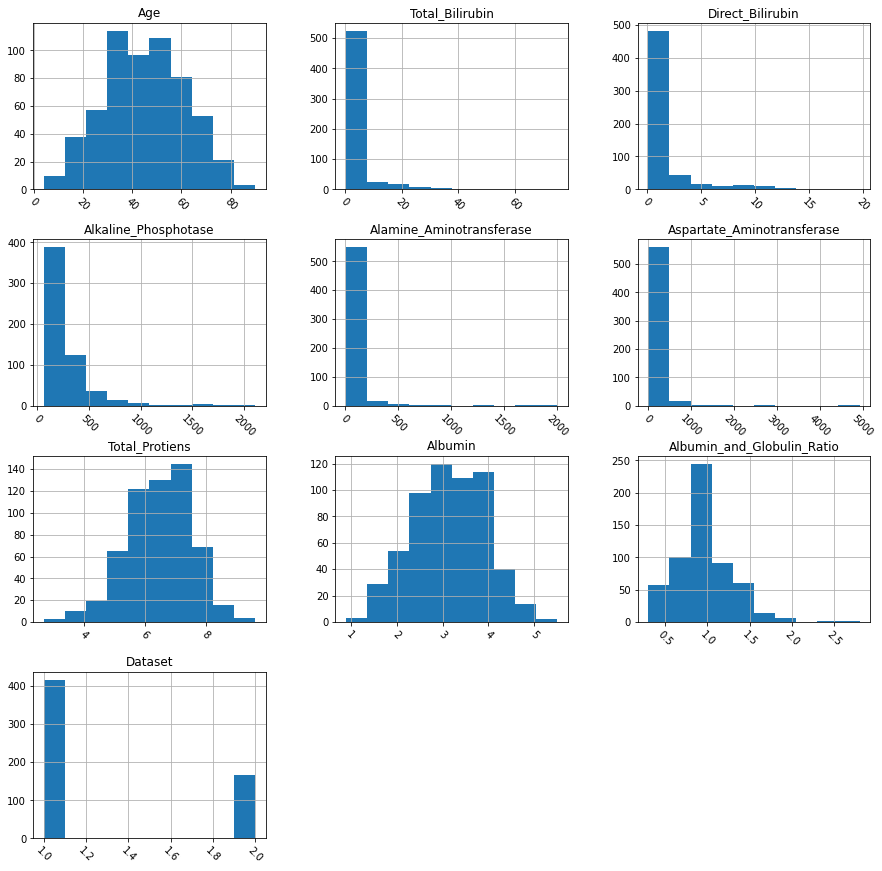

In [7]:
liver_data_train.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

<AxesSubplot:xlabel='count', ylabel='Gender'>

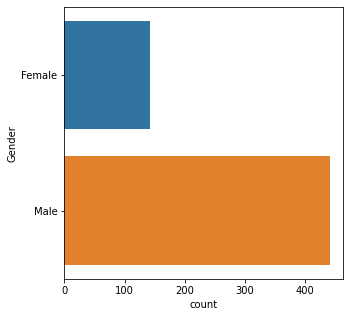

In [8]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=liver_data_train)

C:\Users\Akshit\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


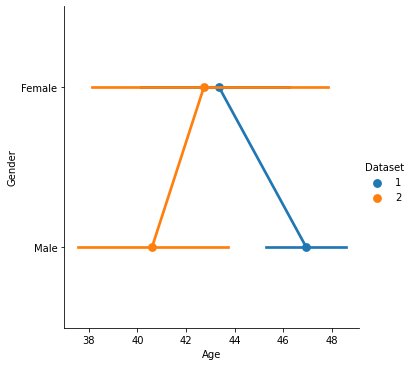

In [9]:
sns.factorplot (x="Age", y="Gender", hue="Dataset", data=liver_data_train);

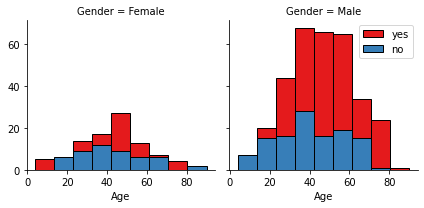

In [10]:
import seaborn as sns
bins = np.linspace(liver_data_train.Age.min(), liver_data_train.Age.max(),10)
grids = sns.FacetGrid(liver_data_train, col="Gender", hue="HasDisease", palette="Set1", col_wrap=2)
grids.map(plt.hist, 'Age', bins=bins, ec="k")

grids.axes[-1].legend()
plt.show()

Amount of bilirubin based on gender

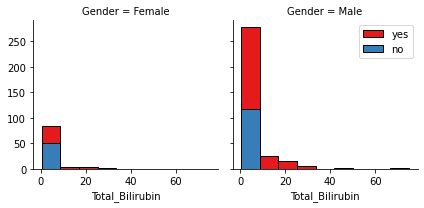

In [11]:
bins = np.linspace(liver_data_train.Total_Bilirubin.min(), liver_data_train.Total_Bilirubin.max(),10)
grids = sns.FacetGrid(liver_data_train, col="Gender", hue="HasDisease", palette="Set1", col_wrap=2)
grids.map(plt.hist, 'Total_Bilirubin', bins=bins, ec="k")

grids.axes[-1].legend()
plt.show()

Total protiens play a major role in liver disease. So plotting it gender wise

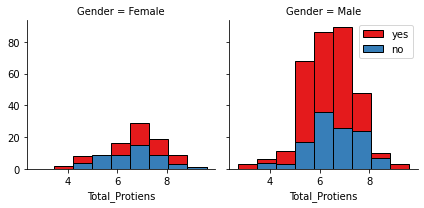

In [12]:
bins = np.linspace(liver_data_train.Total_Protiens.min(), liver_data_train.Total_Protiens.max(),10)
grids = sns.FacetGrid(liver_data_train, col="Gender", hue="HasDisease", palette="Set1", col_wrap=2)
grids.map(plt.hist, 'Total_Protiens', bins=bins, ec="k")

grids.axes[-1].legend()
plt.show()

#### convert males and females to 0 and 1

In [13]:
liver_data_train['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)

#### Check if any column has null values and replace with mean

In [14]:
liver_data_train.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
HasDisease                    0
dtype: int64

In [15]:
liver_data_train['Albumin_and_Globulin_Ratio'].fillna((liver_data_train['Albumin_and_Globulin_Ratio'].mean()), inplace=True)

In [16]:
liver_data_train.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003404,0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Albumin_and_Globulin_Ratio,-0.216089,0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319


<AxesSubplot:>

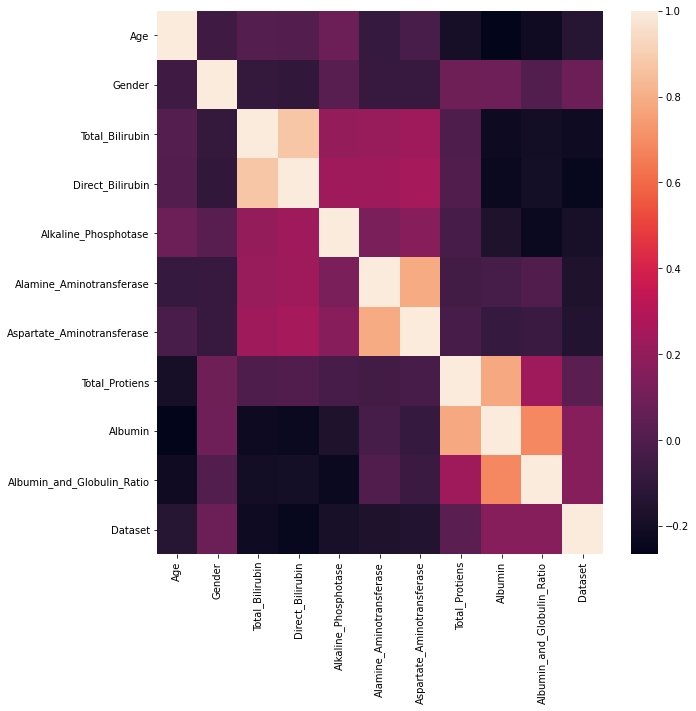

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(liver_data_train.corr())

C:\Users\Akshit\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


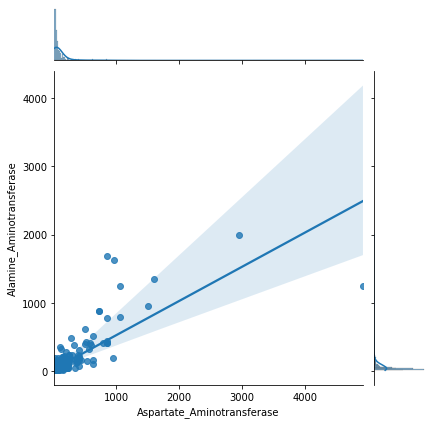

In [18]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=liver_data_train, kind="reg")

C:\Users\Akshit\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


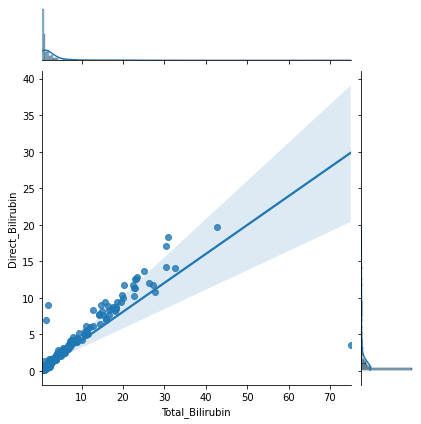

In [19]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=liver_data_train, kind="reg")

### Feature Selection

Feature selection is the process of reducing the number of input variables when developing a predictive model.
Selecting the feature sets, X and the labels, y

In [20]:
Feature = liver_data_train[['Age','Gender','Total_Bilirubin','Direct_Bilirubin',
                      'Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
                      'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']]

In [21]:
X = Feature
y = liver_data_train['HasDisease'].values
y[0:5]

array(['yes', 'yes', 'yes', 'yes', 'yes'], dtype=object)

### Normalize Data

Data Standardization give data zero mean and unit variance

In [22]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.25209764,  1.76228085, -0.41887783, -0.49396398, -0.42671496,
        -0.35466541, -0.31839333,  0.29211961,  0.19896867, -0.14789798],
       [ 1.06663704, -0.56744644,  1.22517135,  1.43042334,  1.68262856,
        -0.09159933, -0.03433257,  0.93756634,  0.07315659, -0.65069686],
       [ 1.06663704, -0.56744644,  0.6449187 ,  0.93150811,  0.82158795,
        -0.11352151, -0.14518555,  0.47653296,  0.19896867, -0.17932291],
       [ 0.81935624, -0.56744644, -0.37052344, -0.38705357, -0.44731402,
        -0.36562649, -0.31146502,  0.29211961,  0.32478075,  0.16635131],
       [ 1.68483904, -0.56744644,  0.0969023 ,  0.18313526, -0.39375647,
        -0.29437943, -0.17636295,  0.75315299, -0.93334003, -1.71914446]])

## Classification

### Decision Tree

In [23]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=5)
liverDiseaseTree = DecisionTreeClassifier(criterion='entropy',max_depth=7)
liverDiseaseTree.fit(X_trainset,y_trainset)
liverDiseaseTree

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [24]:
dt_yhat = liverDiseaseTree.predict(X_testset)

In [25]:
from sklearn.metrics import f1_score
dt_f1 = f1_score(y_testset, dt_yhat, average='weighted')
print(dt_f1)

0.624454910169196


In [26]:
from sklearn.metrics import jaccard_score
dt_ja = jaccard_score(y_testset, dt_yhat,pos_label="yes")
print(dt_ja)

0.6666666666666666


### K Nearest Neighbors

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print('Train Set:',X_train.shape, y_train.shape)
print('Test Set:',X_test.shape, y_test.shape)

Train Set: (466, 10) (466,)
Test Set: (117, 10) (117,)


In [28]:
Knn=10
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
mean_acc = np.zeros((Knn-1))
std_acc = np.zeros((Knn-1))
confusionMx = [];
for n in range(1,Knn):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    knn_hat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, knn_hat)
    std_acc[n-1]=np.std(knn_hat==y_test)/np.sqrt(knn_hat.shape[0])
mean_acc

array([0.65811966, 0.62393162, 0.62393162, 0.61538462, 0.65811966,
       0.64102564, 0.66666667, 0.62393162, 0.66666667])

In [29]:
print( "The best accuracy was with", mean_acc.max(),"with k =",mean_acc.argmax()+1) 

The best accuracy was with 0.6666666666666666 with k = 7


In [30]:
from sklearn.neighbors import KNeighborsClassifier
k_nearest = KNeighborsClassifier(n_neighbors = 7).fit(X_train,y_train)
k_nearest

KNeighborsClassifier(n_neighbors=7)

In [31]:
from sklearn.metrics import f1_score
knn_f1 = f1_score(y_test, knn_hat, average='weighted')

In [32]:
from sklearn.metrics import jaccard_score
knn_ja = jaccard_score(y_test, knn_hat,pos_label="yes")
print(knn_ja)

0.6454545454545455


### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)
LogReg

LogisticRegression(C=0.01, solver='liblinear')

In [34]:
LogReg_yhat = LogReg.predict(X_test)
LogReg_yhat[0:5]

array(['yes', 'yes', 'yes', 'yes', 'yes'], dtype=object)

In [35]:
LogReg_yhat_prob = LogReg.predict_proba(X_test)
LogReg_yhat_prob[0:5]

array([[0.38550075, 0.61449925],
       [0.38140643, 0.61859357],
       [0.38581889, 0.61418111],
       [0.41372373, 0.58627627],
       [0.45929773, 0.54070227]])

In [36]:
from sklearn.metrics import f1_score
LR_f1 = f1_score(y_test, LogReg_yhat, average='weighted')
print(LR_f1)

0.7033393670265179


In [37]:
from sklearn.metrics import jaccard_score
LR_ja = jaccard_score(y_test, LogReg_yhat,pos_label="yes")
print(LR_ja)

0.7047619047619048


In [38]:
from sklearn.metrics import log_loss
LR_log = log_loss(y_test, LogReg_yhat_prob)
print(LR_log)

0.5722557867737494


### Support Vector Machine

In [41]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

In [42]:
Svm = svm.SVC(kernel='rbf')
Svm.fit(X_trainset,y_trainset)
svm_yhat = Svm.predict(X_test)

In [43]:
from sklearn.metrics import f1_score
svm_f1 = f1_score(y_test, svm_yhat, average='weighted')
print(svm_f1)

0.5934692088538241


In [44]:
from sklearn.metrics import jaccard_score
svm_ja = jaccard_score(y_test, svm_yhat,pos_label="yes")
print(svm_ja)

0.6956521739130435


### Accuracy Report

A report on accuracy of each model using different evaluation metrics.Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition:

Accuracy = Number of Correct Predictions / Total number of Predictions

In [45]:
ja_list = [knn_ja, dt_ja, svm_ja, LR_ja]
f1_list = [knn_f1, dt_f1, svm_f1, LR_f1]
log_list = ['NA','NA','NA',LR_log]

accuracyReport = pd.DataFrame(ja_list, index=['KNN','Decision Tree','SVM','LogisticRegression'])
accuracyReport.columns = ['Jaccard']
accuracyReport.insert(loc=1, column='F1-score',value=f1_list)
accuracyReport.insert(loc=2, column='LogLoss',value=log_list)
accuracyReport.columns.name = 'Algorithm'
accuracyReport

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.645455,0.619966,NA
Decision Tree,0.666667,0.624455,NA
SVM,0.695652,0.593469,NA
LogisticRegression,0.704762,0.703339,0.572256


The accuracy report shows the performance of each algorithm on test data